In [1]:
from pandas import read_csv, DataFrame
from sklearn import naive_bayes, cross_validation, metrics, metrics
from sklearn.feature_extraction.text import CountVectorizer
import random
import numpy as np
import re
from nltk.corpus import stopwords
cachedStopWords = stopwords.words("english")
import string
from matplotlib import pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
# lets import data into a dataframe

In [4]:
cd /Users/nickroot/Downloads

/Users/nickroot/Downloads


In [5]:
test_data = read_csv('STFeedback3.csv')
train_data = read_csv('NPS_Train_Data.csv')

In [6]:
# lets do some spring cleaning - take out stopwords and remove punctuation 
def CleaningText(x):
    if isinstance(x, basestring):
        x = re.sub('[^\x00-\x7F]+',' ', x)
        x = x.lower()
        x = ' '.join([word for word in x.split() if word not in cachedStopWords])
        table = string.maketrans("","")
        return x
        y = x.translate(table, string.punctuation)
        return y
    else:
        return " "


In [7]:
len(train_data)


115311

In [8]:
def roundit (x):
    return round(x)
    
   

In [9]:
test_data['CleanComments'] = test_data['Comments'].apply(CleaningText)
train_data['CleanComments'] = train_data['comments'].apply(CleaningText)


In [10]:
#lets give our index column a proper name
#test_data.rename(columns={'Unnamed: 0':'Index'}, inplace=True)
#train_data.rename(columns={'Unnamed: 0':'Index'}, inplace=True)

In [11]:
# lets give the twitter sample some better column names
#test_data.columns = ['Index','Channel', 'time', 'brand', 'NPSGroup', 'NPS_Score', 'comments', 'Other1','Other2', 'Other3', 'CleanComments']

In [12]:
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_data.CleanComments)
X_test = vectorizer.transform(test_data.CleanComments) #need some help understanding this

In [13]:
model = naive_bayes.MultinomialNB().fit(X_train, list(train_data.NPSGroup2))

In [14]:
print cross_validation.cross_val_score(naive_bayes.MultinomialNB(), X_train, train_data.NPSGroup2)
fpr, tpr, threshholds = metrics.roc_curve(train_data.NPSGroup2, model.predict (X_train), pos_label=1)
print metrics.auc(fpr, tpr)

[ 0.91141348  0.91294846  0.91279236]
0.908058068202


In [15]:
predictions = model.predict_proba(X_test)[:,1]


In [16]:
submission = DataFrame({'index': test_data.index, 'NPSGroup': predictions })
submission.to_csv('submission1.csv', index=False)

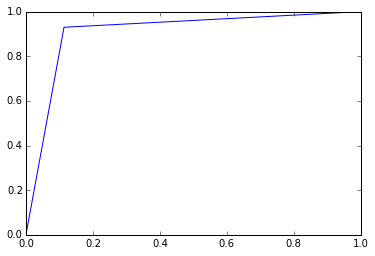

In [17]:
plt.plot(fpr, tpr)

In [18]:
# metrics.confusion_matrix(X_test, predictions)

In [19]:
#print 'Number of mislabelled points: {0}'.format((test_data.NPSGroup2 != model).sum())
#print 'Our of'

In [20]:
pwd

u'/Users/nickroot/Downloads'

In [21]:
# now lets test against the test data
from sklearn import preprocessing, metrics

#NPSGroup = test_data.ix[:,'NPSGroup2']
pred = DataFrame(predictions)
pred.columns = ['prediction']
pred['RoundedPredictions'] = pred['prediction'].apply(roundit)
roundedPredictions = pred.RoundedPredictions

#print "Test Accuracy:", round(metrics.accuracy_score(NPSGroup, roundedPredictions), 5)

In [22]:
#NPSGroup = train_data.ix[:,'NPSGroup2']

In [23]:
test_data['ModelOutput'] = roundedPredictions

In [24]:
test_data.to_csv('BayesModelPredictionsOnSTFeedback.csv')

In [25]:
pwd

u'/Users/nickroot/Downloads'

In [25]:
# Output just the detractors
detractors = test_data[test_data.ModelOutput == 0]

In [441]:
detractors.to_csv('Detractors.csv')